In [53]:
#las librerias que uso las tengo instaladas localmente en el env de miniconda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from pathlib import Path
import os
from os import chdir
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.express as px

In [ ]:
#links

glassdoor_reviews:
https://docs.google.com/spreadsheets/d/1Ep8fVrEiaURMXTvh8QgHGmnutUzus0lOUhMEcNUkGIs/edit?usp=share_link

industries:
https://docs.google.com/spreadsheets/d/1NxVL_c17vpUwiaUS72n0SV9-OvCrOKNIUREFKdSHM2Q/edit?usp=share_link

#**Abstracto**
Este trabajo explora el potencial de aprovechar los datos de Glassdoor mediante algoritmos de machine learning. A pesar de desafíos como la tendencia a reseñas negativas y la falta de verificación de la experiencia laboral, los algoritmos pueden analizar patrones en las opiniones de los empleados para predecir tendencias y evaluar la satisfacción laboral. Usando algoritmos estadísticos y de aprendizaje automático pueden analizar datos numéricos como rangos salariales y puntuaciones de reseñas. Mediante métodos de regresión se pueden identificar correlaciones entre variables, permitiendo a las empresas entender cómo los factores como el salario impactan en la satisfacción laboral.Tambien algoritmos de procesamiento del lenguaje natural pueden analizar reseñas de empleados para extraer sentimientos y temas clave o transformar esta data cualitativa para nuestro analisis de regresión. 

Estos análisis pueden ayudar a las empresas a anticipar problemas, mejorar la retención de talento y fortalecer estrategias de marketing. A través de técnicas de machine learning, la información de Glassdoor se convierte en una herramienta poderosa para la toma de decisiones empresariales, permitiendo una comprensión más profunda y precisa del clima laboral y las percepciones de los empleados.

**Contexto empresarial:**
>Glassdoor se ha convertido en la única plataforma que permite ver a profesionales que buscan oportunidades laborales o que quieren tener una idea de una compañía o un punto de comparación a otras. Esta ventaja de mercado la convierte en la única fuente de opiniones  sobre cultura corporativa, rangos de salarios, etc. Está posición dominante lo hace una fuente única de información, además de ser un portal de empleo donde las personas que van aplicar, van a tener una reseña de la empresa que a la cual van aplicar. 

**Problema empresarial:**
> Para cualquier compañía tener referencias es importante y a través de está información se puede hacer un modelo que ayude a ver qué variables predicen mejor la  tenencia de una opinión muy desfavorable o muy positiva. Este recurso es vital para las empresas al permitirles anticipar necesidades de fuerza laboral, fortalecer áreas clave y mejorar estrategias de atracción y retención de talentoútil para anticiparse a las necesidades de tu fuerza de trabajo, reforzar áreas donde puedes crear un fuerte impacto en el esfuerzo de atracción y retención de talento y además de ser una herramienta de mercadeo de la empresa.  


**Problema analítico:**

>A continuación analizamos algunos aspectos a considerar.Glassdoor, una plataforma líder en el mercado, proporciona valiosas opiniones sobre empresas, salarios y cultura corporativa, siendo una fuente crucial para profesionales y empleadores. Sin embargo, enfrenta desafíos, como la tendencia a reseñas negativas, especialmente tras despidos masivos, y la falta de verificación de la experiencia laboral de los usuarios. A pesar de estas limitaciones, Glassdoor sigue siendo una fuente única y pública de información en un mercado laboral opaco.

>El dataset tiene un foco especifico en el mercado laboral de UK.Comprende:la fecha en la que se emitió la opinión, nombre de la empresa,  cargo que ocupó, si se es empleado o hace cuanto fue empleado, visión sobre el rol del CEO, cultura de la empresa y una oportunidad de enumerar aspectos positivos y negativos de la compañía. Muchas de estas variables son cuantitativas y otras cuantitativas ordinales como por ejemplo la visión sobre el CEO de la compañia. El objetivo de este trabajo es lograr un método que ayuda a predecir que variables ayudan a predecir mejor la apreciación de una compañia.

  



In [2]:
os.chdir("C:/Users/Rodolfo/Downloads")
os.getcwd()

'C:\\Users\\Rodolfo\\Downloads'

In [108]:
df = read_csv('glassdoor_reviews.csv')
industries = read_csv('firms&industries.csv')

***Hipotésis:***

 Qué factores ayudan a predecir una buena o mala puntuación sobre una comapañia?
 
 Preguntas secundarias:
    1. Cuál es el área de más preocupación para una empresa?
    2. Hay una relación entre algunos de estos factores o son indepndientes?
    3. Afecta el rol en lo que se valora más?
    4.Estas variables son las mismas dependiendo del tipo de compañia o el sector?
    5. Se puede hacer un perfil de valoración por empresa?

   
 *Será este dataset lo sufiviente robusto para crear un modelo interesante?

In [4]:
df.head(6)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
5,AFH-Wealth-Management,2016-05-26,Office Administrator,"Current Employee, less than 1 year",NaN,3,4.0,2.0,NaN,2.0,3.0,2.0,o,r,r,Office administrator,Some good people to work with.\n\nFlexible wor...,Morale.\n\nLack of managerial structure.\n\nDo...


In [5]:
df.describe()

df.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286374 entries, 0 to 286373
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 286374 non-null  object 
 1   date_review          286374 non-null  object 
 2   job_title            286374 non-null  object 
 3   current              286374 non-null  object 
 4   location             188641 non-null  object 
 5   overall_rating       286374 non-null  int64  
 6   work_life_balance    238886 non-null  float64
 7   culture_values       224590 non-null  float64
 8   diversity_inclusion  47964 non-null   float64
 9   career_opp           239451 non-null  float64
 10  comp_benefits        238888 non-null  float64
 11  senior_mgmt          237138 non-null  float64
 12  recommend            286374 non-null  object 
 13  ceo_approv           286374 non-null  object 
 14  outlook              286374 non-null  object 
 15  headline         

> A simple vista podemos observar que hay las columnas de "location" y "diversity_inclusion" tienen un numero importante de valores nulos. Lo cual puede hacer su uso en un modelo dificil. También hay columnas, como "job_title", que tienen valores vacios que hay que manejar. Primero convirtiendolos en nulos y después, dependiendo de la cantidad, ver que estrategía utilizar para poder aprovecharlos.

In [7]:
df.duplicated().sum()

9168

###Análisis de las Categorías:


*  Cargos: queremos ver qué cargos y cómo se distribuyen estos cargos



In [8]:
#Agregamos la columna de Dobles Dobles. Se puede elegir entre el valor más alto entre rebotes, asistencias y puntos o hacer un promedio entre ellos.
#Para este caso vamos a elegir el mayor numero entre rebotes o asistencias.

firms = df[['firm', 'job_title']]
firms.describe()
print((firms['job_title'].value_counts())/df.shape[0]*100)

job_title
 Anonymous Employee                        19.260827
                                            9.508894
 Consultant                                 2.763170
 Manager                                    2.293504
 Senior Consultant                          2.180715
                                             ...    
 Infrastructure Technician (Middleware)     0.000349
 CHANGE ASSURANCE                           0.000349
 OTC Clearing/Prime Brokerage               0.000349
 RISK & CONTROL ANALYST                     0.000349
 Ad Sense Sales Manager                     0.000349
Name: count, Length: 27090, dtype: float64




> Podemos observar que un 19% de los reviews son anónimos y un 9.5% están vacios. En este caso es válido simplemente agregarlos a la categoría de anónimo que básicamente corresponde con la misma clasificación. Dejando los anónimos  como un 31% apróximadamente. Por la naturaleza de los reviews de Glassdoor tiene sentido que haya muchas reviews que se nieguen a poner el rol y la empresa.       


In [9]:
print((firms['firm'].value_counts())/df.shape[0]*100)

firm
Deloitte                                              16.410358
EY                                                    11.890046
Apple                                                  7.262182
Citi                                                   6.539001
Barclays                                               3.390671
                                                        ...    
Animal-and-Plant-Health-Agency                         0.007682
BayWa-r-e-renewable-energy                             0.006285
Engineering-and-Physical-Sciences-Research-Council     0.005936
Abertawe-Bro-Morgannwg-University-Health-Board         0.003143
Achieving-for-Children                                 0.002095
Name: count, Length: 149, dtype: float64


>De la misma forma podemos observar que hay una representación muy grande en la muestra de pocas empresas, siendo estas Delloite (16.4%), Ernest & Young (12%), Apple (7%), Citi Bank (6,5%) y la entidad financiera Barclay's (3.39%). Con casi el 40% de los reviews. Sería interesante estudiar el dataset filtrando estas empresas a ver que tan distinto llegan a ser los resultados.


In [15]:
firms['firm'].unique()

array(['AFH-Wealth-Management', 'AJ-Bell', 'ALDI', 'AQA', 'ASDA', 'ASOS',
       'AXA-UK', 'Abcam',
       'Abertawe-Bro-Morgannwg-University-Health-Board', 'Accenture',
       'Accor', 'Achieving-for-Children', 'ActionCOACH',
       'Active-Care-Group', 'Adecco', 'Age-UK-The-National-Charity',
       'AlixPartners', 'American-Express', 'Amey', 'Angard-Staffing',
       'Anglian-Water', 'Anglo-American',
       'Animal-and-Plant-Health-Agency', 'Aon', 'Apple', 'Arcadia',
       'Arnold-Clark', 'AstraZeneca', 'Aviva', 'B-and-M-Retail',
       'B-and-Q', 'BAT', 'BBC', 'BDO', 'BHS', 'BIS', 'BNP-Paribas',
       'BNY-Mellon', 'BP', 'BPP-Holdings', 'BT',
       'Babcock-International-Group', 'Babylon-Health',
       'Bain-and-Company', 'Balfour-Beatty', 'Bannatyne-Group',
       'Barchester-Healthcare', 'Barclays', 'Barnardo-s',
       'Barnet-and-Chase-Farm-Hospitals-NHS-Trust', 'Barnett-Waddingham',
       'Barratt-Developments', 'Barts-Health-NHS-Trust',
       'BayWa-r-e-renewable-energ

In [109]:
industries['firm'] = industries['firm'].str.replace("'","",)
industries

,firm,industry,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Abcam,Healthcare,NaN,NaN,NaN,NaN
1,Abertawe-Bro-Morgannwg-University-Health-Board,Healthcare,NaN,NaN,NaN,NaN
2,Accenture,Consulting,NaN,NaN,NaN,NaN
3,Accor,Hospitality,NaN,NaN,NaN,NaN
4,Achieving-for-Children,Other,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
144,GlaxoSmithKline,Pharmaceutical,NaN,NaN,NaN,NaN
145,GLL,Pharmaceutical,NaN,NaN,NaN,NaN
146,Goldman-Sachs,Finance,NaN,NaN,NaN,NaN
147,Google,IT,NaN,NaN,NaN,NaN


In [110]:
#genero un diccionario key-value 
industry_dict = dict(zip(industries['firm'], industries['industry']))


#lo uso para mapear los valores a cada una de las compañias
df['industry'] = df['firm'].map(industry_dict)

overall_mean = df.groupby(['firm','industry'],as_index=False)['overall_rating'].agg(['mean','count'])

print(overall_mean)

fig = px.scatter(overall_mean , x='mean',y='count', color='industry', log_y= True,
  hover_name='firm', labels={'mean': "overall rating", 'count':'number of reviews'}, size= 'mean',
  title='Puntaje Total Promedio por Compañia')


fig.show()

print('promedio de todos los reviews:' + str(df['overall_rating'].mean())+ '|' + 'promedio no pesado:'+ str(overall_mean['mean'].mean()))

                      firm        industry      mean  count
0    AFH-Wealth-Management         Finance  2.904762     63
1                  AJ-Bell         Finance  3.359649    114
2                     ALDI          Retail  3.422127    931
3                      AQA       Education  3.622807    114
4                     ASDA          Retail  3.352521   4760
..                     ...             ...       ...    ...
144                Gateley  Legal Services  4.540984     61
145               Gi-Group      Consulting  3.392857    196
146        GlaxoSmithKline  Pharmaceutical  3.698016   5646
147          Goldman-Sachs         Finance  3.846730   8808
148                 Google              IT  4.036290    248

[149 rows x 4 columns]


promedio de todos los reviews:3.63867529873522|promedio no pesado:3.5488595982550586


> No hay una diferencia muy significativa entre los dos tipos de promedio y como demuestra el gráfico el puntaje de la mayoría de las empresas estan concentradas alrededor del 3,5-3,6. Hay tres empresas que tienen puntuaciones muy por debajo del promedio. 

firm
Deloitte            46995
EY                  34050
Apple               20797
Citi                18726
Barclays             9710
American-Express     9349
Goldman-Sachs        8808
BNY-Mellon           6630
Deutsche-Bank        6388
GlaxoSmithKline      5646
Name: count, dtype: int64


Text(1.0, 1.0, 'Opiniones por empresa')

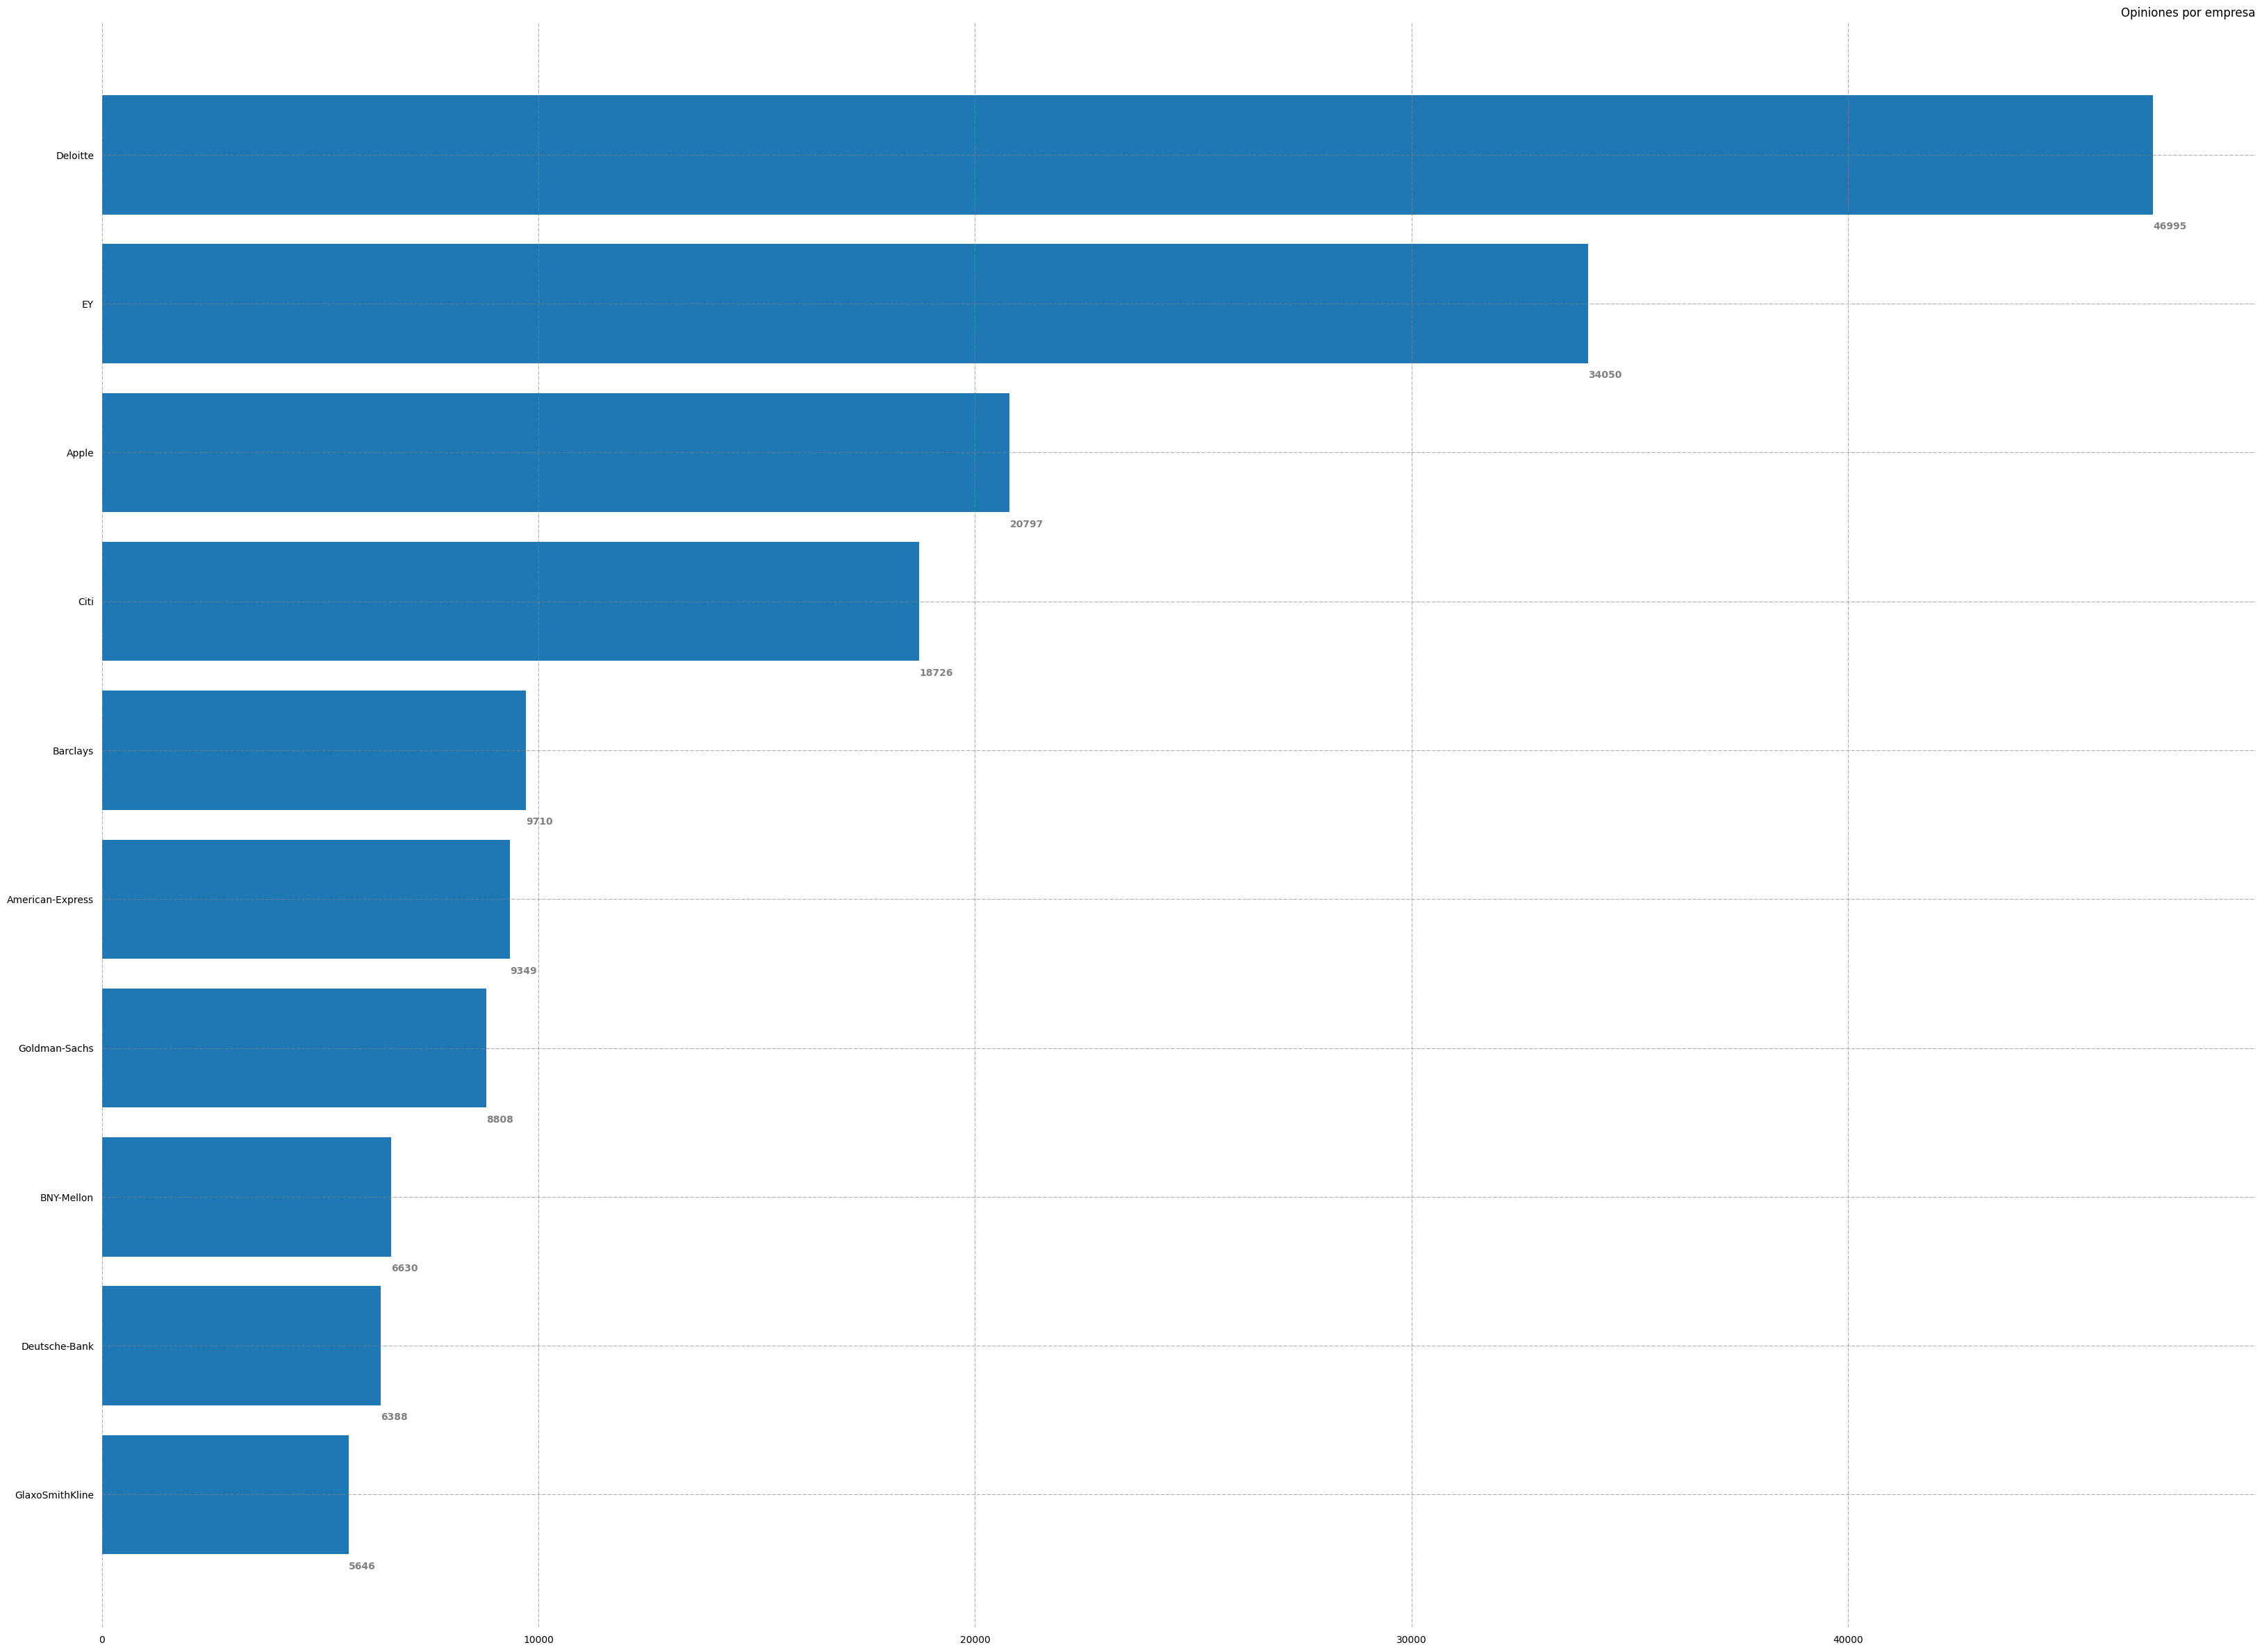

In [117]:


toptenfirms = firms['firm'].value_counts().head(10)

fig, ax = plt.subplots(figsize =(40,30))




review_quantity = toptenfirms.values
firm_names = toptenfirms.index

ax.barh(firm_names, review_quantity)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

# Add x, y gridlines
ax.grid( color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 1)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.6, i.get_y()+0.9,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Opiniones por empresa',
             loc ='right', )



# Show Plot
# plt.show()

In [11]:
#Filtramos los resultados por pertenencia a estas compañias

Not_DEACB_firms = df[~df['firm'].isin(['Deloitte','EY','Apple','Citi','Barclays'])]

DEACB_firms = df[df['firm'].isin(['Deloitte','EY','Apple','Citi','Barclays'])]

In [12]:
print((Not_DEACB_firms['firm'].value_counts())/df.shape[0]*100)

firm
American-Express                                      3.264612
Goldman-Sachs                                         3.075698
BNY-Mellon                                            2.315154
Deutsche-Bank                                         2.230649
GlaxoSmithKline                                       1.971548
                                                        ...   
Animal-and-Plant-Health-Agency                        0.007682
BayWa-r-e-renewable-energy                            0.006285
Engineering-and-Physical-Sciences-Research-Council    0.005936
Abertawe-Bro-Morgannwg-University-Health-Board        0.003143
Achieving-for-Children                                0.002095
Name: count, Length: 144, dtype: float64


c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Rodolfo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a 

Text(0.5, 1.0, 'Todas las compañias')

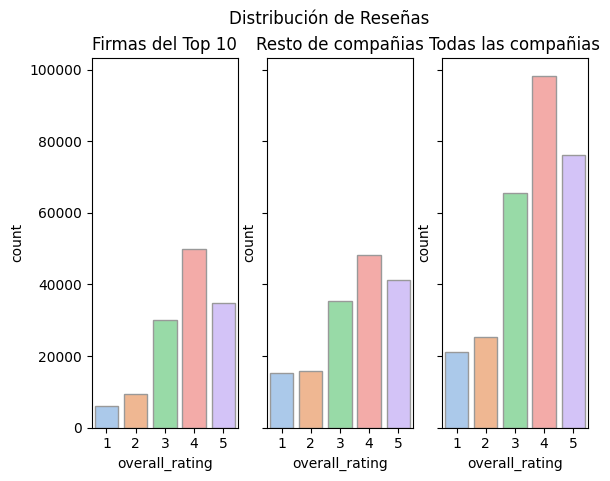

In [124]:
#agregar a df o firms una columna que conterga si pertenecen o no a la distribución normal
# ver como la profesora hizo el grafico en una escala logaritmica para ver si normaliza el dataset
fig, axs = plt.subplots(ncols=3, sharey= True)

fig.suptitle('Distribución de Reseñas ')
sns.countplot(data=DEACB_firms, x="overall_rating", 
    palette="pastel", edgecolor=".6", ax=axs[0])
axs[0].set_title('Firmas del Top 10')
sns.countplot(data=Not_DEACB_firms, x="overall_rating", 
    palette="pastel", edgecolor=".6", ax=axs[1])
axs[1].set_title('Resto de compañias')
sns.countplot(data=df, x="overall_rating", 
    palette="pastel", edgecolor=".6", ax=axs[2])
axs[2].set_title('Todas las compañias')


> El top diez de  las compañias por cantidad de reseñas tiene una menor menos puntuaciones de 1 ó 2 pero parece tener una distribución de estas reseñas que sigue la tendencia del resto de las compañias de la muestra. La tendencia demuestra una concentración de reseñas con valores superiores a tres en los tres escenarios. Y tambin tanto para las empresas más reseñadas y el resto el valor que más ponen en sus reseñas es 4. 


Ranking for the recommendation of the firm, CEO approval, and outlook are allocated categories v, r, x, and o, with the following meanings:
v - Positive, r - Mild, x - Negative, o - No opinion

